# สร้าง Neural Network เพื่อทำนายคุณภาพไวน์แดง

## Red Wine Quality dataset 
The dataset was created by Paulo Cortez from the University of Minho in Portugal and António Cerdeira, Fernando Almeida, Telmo Matos, and José Reis from the Viticulture Commission of the Vinho Verde Region in Portugal.

### Attributes: (all numeric-valued)

1. Fixed acidity: the amount of acids in the wine that do not evaporate easily.
1. Volatile acidity: the amount of acetic acid in the wine, which can contribute to a vinegary taste.
1. Citric acid: the amount of citric acid in the wine, which can add freshness and flavor.
1. Residual sugar: the amount of sugar left over after fermentation, which can contribute to sweetness.
1. Chlorides: the amount of salt in the wine, which can contribute to a salty taste.
1. Free sulfur dioxide: the amount of sulfur dioxide that is not bound to other molecules, which can prevent microbial growth and oxidation.
1. Total sulfur dioxide: the total amount of sulfur dioxide, which includes both free and bound forms.
1. Density: the density of the wine, which can provide information about the alcohol content.
1. pH: the acidity or basicity of the wine, which can affect the taste and stability.
1. Sulphates: the amount of sulfates in the wine, which can act as a preservative and also enhance flavor.
1. Alcohol: the percentage of alcohol in the wine, which can affect the taste and body.

These features are all chemical properties that can affect the taste, aroma, and overall quality of the wine. The target variable is a quality score between 0 and 10, which is based on sensory data and subjective evaluations by wine experts.

In [38]:
from IPython.display import display, HTML, clear_output

display(HTML('<style>.container { width:100% !important; }</style>'))

# เราสามารถดาวน์โหลดข้อมูล Red Wine dataset จาก Kaggle
## โดยดาวน์โหลดได้ที่ https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [39]:
import numpy as np
import pandas as pd

df = pd.read_csv('winequality-red.csv')

In [40]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [41]:
classes, counts = np.unique(df['quality'], return_counts=True)
print('class:', classes)
print('count:', counts)

class: [3 4 5 6 7 8]
count: [ 10  53 681 638 199  18]


## Split Red Wine Dataset into train and test datasets

In [42]:
from sklearn.model_selection import train_test_split

# separate the features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

# Train model using RandomForestRegressor
## Machine Learning Approach

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a random forest regression model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE: ", mse)

Test MSE:  0.32225374999999995


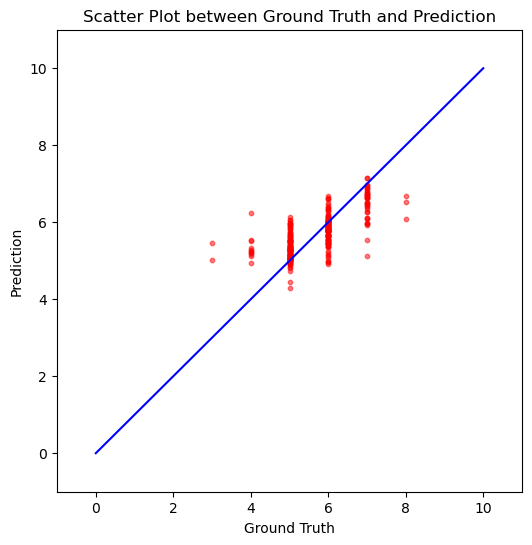

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

y_pred = rf_model.predict(X_test)

# Create a scatter plot of the data
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_test, y_pred, color='red', alpha=0.5, s=10)

# Plot the regression line on top of the scatter plot
ax.plot((0, 10), (0, 10), '-', color='blue')

# Set the x and y axis limits
ax.set_xlim([-1, 11])
ax.set_ylim([-1, 11])

# Add labels and a title to the plot
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Scatter Plot between Ground Truth and Prediction')

# Show the plot
plt.show()

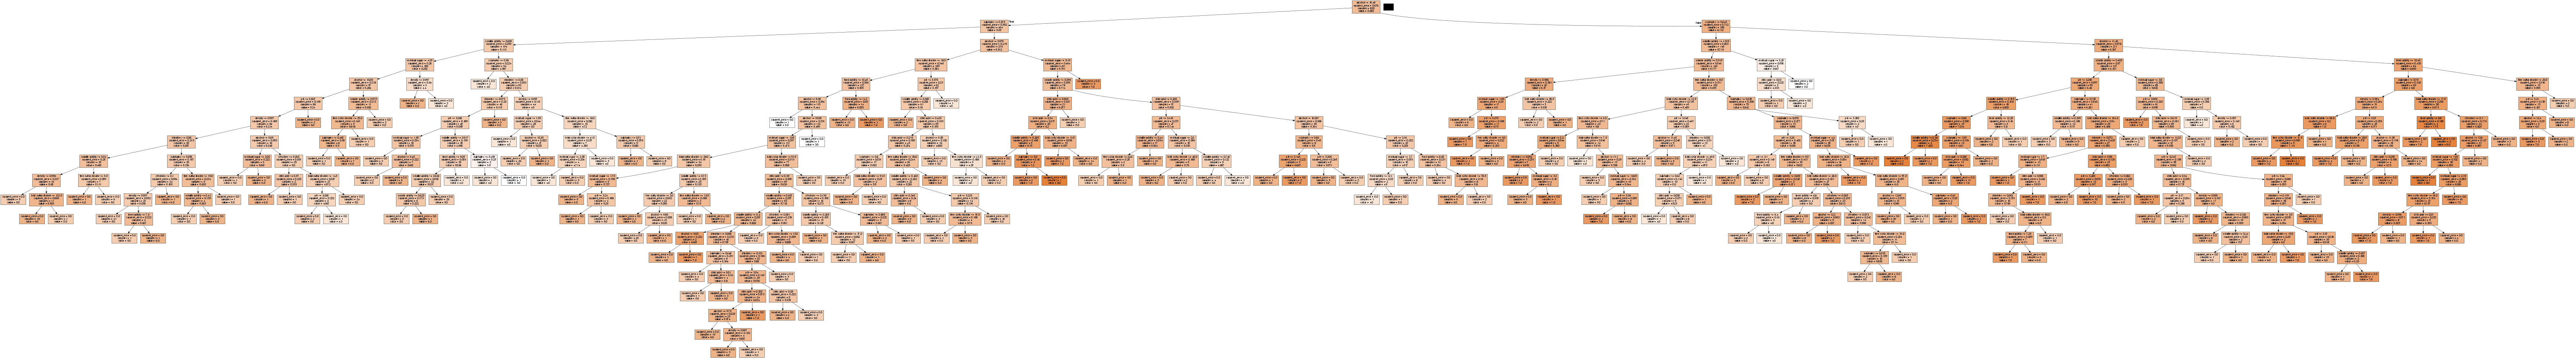

In [45]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import os, pydotplus, graphviz

os.environ["PATH"] += os.pathsep

dot_data = export_graphviz(rf_model.estimators_[0], out_file=None,
                           feature_names=X.columns, filled=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"70,20!"')
pydot_graph.write_png('tree.png')

# Display the decision tree
Image(filename='tree.png', unconfined=True)

# Train model using MLP (Multi-Layer Perceptron)
## Deep Learning Approach

In [46]:
from sklearn.preprocessing import StandardScaler

## First let's normalize the data
## This aids the training of neural nets by providing numerical stability

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [47]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# create the model
mlp_model = Sequential()
mlp_model.add(Dense(units=128, activation='relu', input_shape=X_train_norm.shape[1:]))
mlp_model.add(Dense(units=1, activation='linear'))

mlp_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1536      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


In [48]:
# compile the model
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
mlp_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])

# train the model
history = mlp_model.fit(X_train_norm, y_train, epochs=100, batch_size=32, validation_data=(X_test_norm, y_test))

Epoch 1/100
40/40 [==============================] - 1s 8ms/step - loss: 15.7974 - mean_absolute_error: 3.5328 - val_loss: 3.9225 - val_mean_absolute_error: 1.5105
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 2.8568 - mean_absolute_error: 1.3066 - val_loss: 1.9802 - val_mean_absolute_error: 1.1367
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 1.8763 - mean_absolute_error: 1.0743 - val_loss: 1.6750 - val_mean_absolute_error: 1.0530
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 1.5049 - mean_absolute_error: 0.9620 - val_loss: 1.4253 - val_mean_absolute_error: 0.9502
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 1.2471 - mean_absolute_error: 0.8775 - val_loss: 1.2414 - val_mean_absolute_error: 0.8964
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 1.0479 - mean_absolute_error: 0.8054 - val_loss: 1.0501 - val_mean_absolute_error: 0.8140
Epoch 7/100
40/40 [==

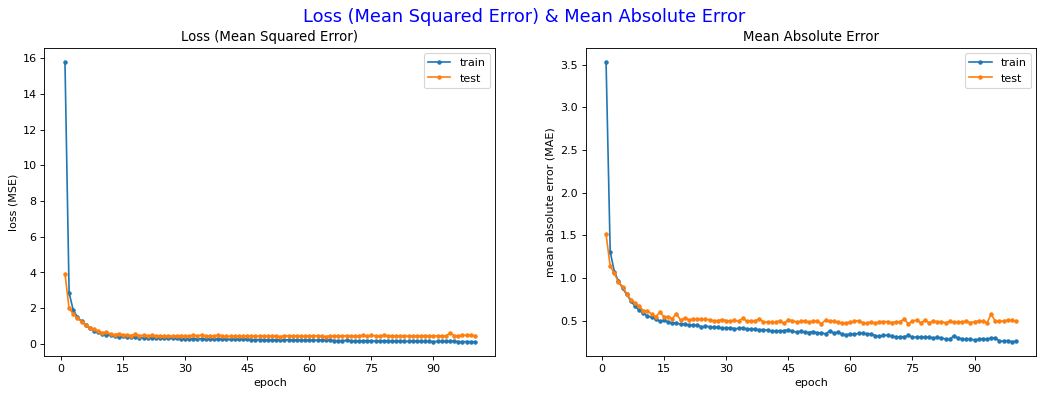

In [49]:
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(16, 5), dpi=80)
fig.suptitle('Loss (Mean Squared Error) & Mean Absolute Error', color='blue', fontsize=16)

x = range(1, len(history.history['loss'])+1)
ax = fig.add_subplot(1, 2, 1)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(x, history.history['loss'], marker='.', label='Train Loss')
ax.plot(x, history.history['val_loss'], marker='.', label='Val Loss')
ax.set_title('Loss (Mean Squared Error)')
ax.set_ylabel('loss (MSE)')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper right')

ax = fig.add_subplot(1, 2, 2)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(x, history.history['mean_absolute_error'], marker='.', label='Train MAE')
ax.plot(x, history.history['val_mean_absolute_error'], marker='.', label='Val MAE')
ax.set_title('Mean Absolute Error')
ax.set_ylabel('mean absolute error (MAE)')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper right')

In [50]:
# Evaluate the model on the test data
y_pred = mlp_model.predict(X_test_norm)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE: ", mse)

10/10 [==============================] - 0s 2ms/step
Test MSE:  0.45253479894284754


10/10 [==============================] - 0s 2ms/step


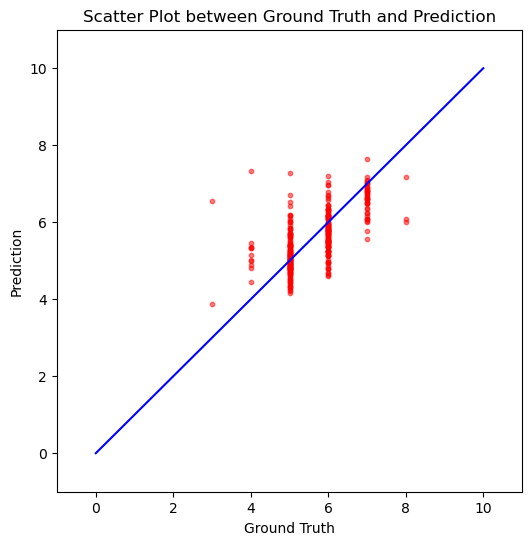

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

y_pred = mlp_model.predict(X_test_norm)

# Create a scatter plot of the data
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_test, y_pred, color='red', alpha=0.5, s=10)

# Plot the regression line on top of the scatter plot
ax.plot((0, 10), (0, 10), '-', color='blue')

# Set the x and y axis limits
ax.set_xlim([-1, 11])
ax.set_ylim([-1, 11])

# Add labels and a title to the plot
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Scatter Plot between Ground Truth and Prediction')

# Show the plot
plt.show()